# ffn Tutorial

In [1]:
#pip install ffn

In [32]:
import ffn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Getting Data

In [33]:
#get method gets stock data and returns a dataframe of stock data
#can pass in multiple stocks seperated by commas
#can specify what price you want (open, high, low) and end date
prices = ffn.get("c,wfc,hsbc,ms", start = "2010-01-01")

#can use pandas methods to get a basic idea of the data
#can also use data.csv() to load data from a csv

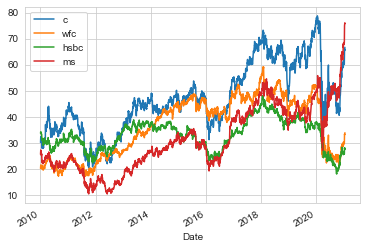

In [34]:
prices.plot()

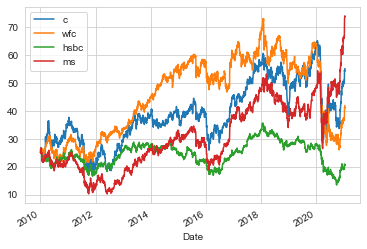

In [5]:
#rebase so that we get a common starting price in the plot, default is 100
#rebase so we see how they performed compared to each other
prices.rebase(value = 25).plot()

# Returns

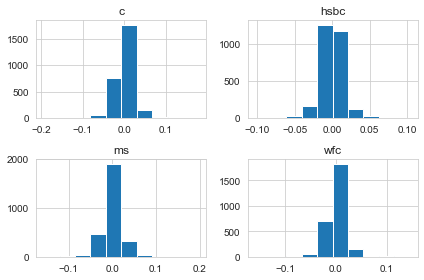

In [35]:
returns = prices.to_returns().dropna()
returns.hist()
plt.tight_layout()

In [7]:
returns.corr().as_format('.2f') #as format used to round to 2 decimal places 

,c,wfc,hsbc,ms
c,1.00,0.79,0.66,0.82
wfc,0.79,1.00,0.63,0.75
hsbc,0.66,0.63,1.00,0.63
ms,0.82,0.75,0.63,1.00


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/pyplot.py'>

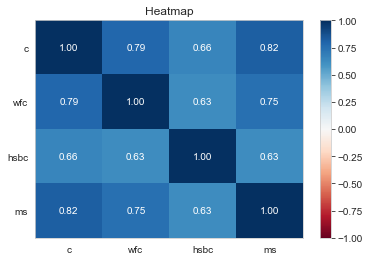

In [8]:
#built in headmap correlation plot
returns.plot_corr_heatmap()

# Stats

In [9]:
#talk about different types of GroupStats and PerformanceStats Objects
stats = prices.calc_stats()
type(stats)
#GroupStats object is a dictionary where the keys are the tickers and the values are Performance objects for each ticker

ffn.core.GroupStats

In [10]:
stats.display()
#MTD stands for month to date, period starting from the beginning of the current month up until now

Stat                 c           wfc         hsbc        ms
-------------------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2021-01-12  2021-01-12  2021-01-12  2021-01-12
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         121.05%     67.80%      -16.88%     195.57%
Daily Sharpe         0.38        0.31        0.05        0.45
Daily Sortino        0.61        0.50        0.08        0.75
CAGR                 7.46%       4.81%       -1.66%      10.33%
Max Drawdown         -56.51%     -64.46%     -62.26%     -61.62%
Calmar Ratio         0.13        0.07        -0.03       0.17

MTD                  8.13%       12.46%      8.10%       10.61%
3m                   47.11%      32.77%      38.32%      50.50%
6m                   29.50%      34.42%      17.29%      54.41%
YTD                  8.13%       12.46%      8.10%       10.61%
1Y                   -12.48%     -3

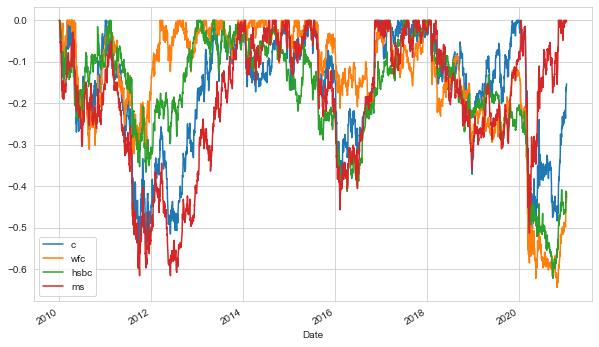

In [11]:
stats.prices.to_drawdown_series().plot(figsize = (10,6))

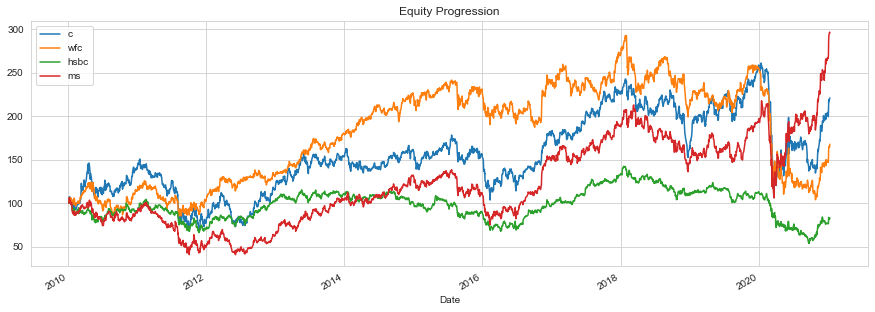

In [12]:
stats.plot()

In [13]:
stats["ms"].display()

Stats for ms from 2010-01-04 00:00:00 - 2021-01-12 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
195.57%             0.45  10.33%  -61.62%

Annualized Returns:
mtd     3m      6m      ytd     1y      3y      5y      10y     incep.
------  ------  ------  ------  ------  ------  ------  ------  --------
10.61%  50.50%  54.41%  10.61%  49.55%  14.21%  24.68%  12.19%  10.33%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.45     0.50       0.51
mean    16.28%   16.54%     16.28%
vol     35.93%   32.82%     31.83%
skew    0.32     0.00       -0.64
kurt    9.46     1.17       -0.08
best    19.77%   30.96%     65.34%
worst   -15.60%  -24.49%    -43.90%

Drawdowns:
max      avg       # days
-------  ------  --------
-61.62%  -5.96%     65.31

Misc:
---------------  ------
avg. up month    7.08%
avg. down month  -7.12%
up year %        72.73%


In [14]:
stats["ms"].display_lookback_returns()

mtd      10.61%
3m       50.50%
6m       54.41%
ytd      10.61%
1y       49.55%
3y       14.21%
5y       24.68%
10y      12.19%
incep    10.33%
Name: ms, dtype: object

In [15]:
stats["wfc"].stats

start                    2010-01-04 00:00:00
end                      2021-01-12 00:00:00
rf                                         0
total_return                        0.678047
cagr                               0.0480811
max_drawdown                       -0.644571
calmar                             0.0745939
mtd                                 0.124586
three_month                         0.327719
six_month                           0.344175
ytd                                 0.124586
one_year                           -0.327534
three_year                         -0.154556
five_year                         -0.0481982
ten_year                           0.0358465
incep                              0.0480811
daily_sharpe                        0.307041
daily_sortino                       0.497547
daily_mean                         0.0906478
daily_vol                           0.295231
daily_skew                          0.014599
daily_kurt                           10.0106
best_day  

In [16]:
stats["c"].return_table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
2010,-0.023529,0.024096,0.191176,0.079012,-0.093821,-0.050505,0.090426,-0.095122,0.053908,0.066496,0.007194,0.126190,0.391176
2011,0.019028,-0.029046,-0.055555,0.038461,-0.103265,0.011908,-0.079010,-0.190141,-0.174879,0.233021,-0.129813,-0.042576,-0.443294
2012,0.167617,0.084979,0.096938,-0.096033,-0.197394,0.033950,-0.010215,0.095506,0.101313,0.142726,-0.075174,0.144345,0.505512
2013,0.065977,-0.004507,0.054086,0.054702,0.114474,-0.077323,0.086929,-0.072895,0.003724,0.005767,0.084871,-0.015306,0.318358
2014,-0.089621,0.025300,-0.021180,0.006513,-0.006889,-0.009880,0.038637,0.056021,0.003291,0.033195,0.008220,0.002594,0.039218
2015,-0.132139,0.116507,-0.017169,0.034938,0.015214,0.021450,0.059190,-0.085187,-0.072363,0.072740,0.017303,-0.043261,-0.040816
2016,-0.176182,-0.087600,0.074646,0.109675,0.006266,-0.089757,0.037246,0.089705,-0.010683,0.040652,0.151098,0.053910,0.159033
2017,-0.060575,0.074355,0.000167,-0.009064,0.024019,0.104724,0.023475,-0.001533,0.069234,0.010448,0.031628,-0.014437,0.270267
2018,0.054697,-0.034197,-0.105842,0.011407,-0.018520,0.003449,0.074268,-0.002795,0.007019,-0.087538,-0.003423,-0.196481,-0.284863
2019,0.238186,-0.000469,-0.027509,0.136290,-0.115275,0.126790,0.016136,-0.088902,0.073504,0.040243,0.052838,0.063499,0.578204


# Calculations 

In [17]:
ffn.calc_cagr(prices)

c       0.074617
wfc     0.048081
hsbc   -0.016637
ms      0.103316
dtype: float64

In [18]:
ffn.calc_calmar_ratio(prices)

c       0.132048
wfc     0.074594
hsbc   -0.026722
ms      0.167657
dtype: float64

{0: ['c', 'wfc', 'ms'], 1: ['hsbc']}

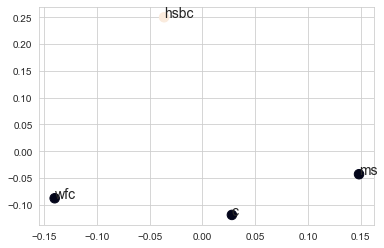

In [19]:
#do with more stocks
#clusters based on how correlated series are
ffn.calc_clusters(returns, n = 2, plot = True)

{0: ['c', 'wfc'], 1: ['hsbc'], 2: ['ms']}

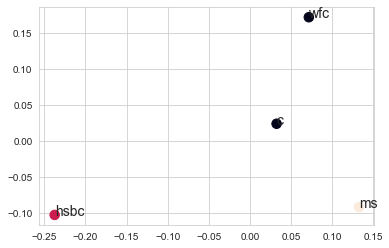

In [20]:
ffn.calc_clusters(returns, n = 3, plot = True)

In [21]:
returns.calc_mean_var_weights()

c       8.213609e-02
wfc     1.387779e-16
hsbc    0.000000e+00
ms      9.178639e-01
dtype: float64

In [22]:
ffn.calc_inv_vol_weights(returns)

c       0.212196
wfc     0.257812
hsbc    0.318129
ms      0.211862
dtype: float64

In [23]:
ffn.calc_risk_return_ratio(prices)

c       3.616322
wfc     3.278566
hsbc    5.762396
ms      2.549139
dtype: float64

In [24]:
#probability one asset will outperform the other
ffn.calc_prob_mom(returns = returns["ms"], other_returns = returns["hsbc"])

0.5135906283070965

In [25]:
ffn.calc_total_return(prices) * 100 #to get total return as a percentage

c       121.053030
wfc      67.804745
hsbc    -16.883578
ms      195.571247
dtype: float64

In [26]:
ffn.calc_max_drawdown(prices)

c      -0.565076
wfc    -0.644571
hsbc   -0.622602
ms     -0.616232
dtype: float64

# Other Tools

In [27]:
#Convert return expressed in annual terms on a different basis.
#For example, let's say we want the period to be every 2 weeks
ffn.deannualize(returns, nperiods= 52 / 2)

,c,wfc,hsbc,ms
Date,,,,
2010-01-05,0.001444,0.001042,0.000609,0.001382
2010-01-06,0.001181,0.000055,0.000045,0.000489
2010-01-07,0.000106,0.001372,-0.000123,0.000553
2010-01-08,-0.000637,-0.000358,-0.000085,-0.000791
2010-01-11,0.000426,-0.000080,0.000026,-0.000251
...,...,...,...,...
2021-01-06,0.002154,0.002633,0.003247,0.002254
2021-01-07,0.000451,0.000861,-0.000191,0.000652
2021-01-08,-0.000380,-0.000277,-0.000275,0.000159


In [29]:
drawdown_series = ffn.to_drawdown_series(prices["ms"])

In [151]:
ffn.drawdown_details(drawdown_series)

,Start,End,Length,drawdown
0,2012-05-22 00:00:00,2012-05-23 00:00:00,1,-0.00767916
1,2012-05-24 00:00:00,2012-05-29 00:00:00,5,-0.0144945
2,2012-05-31 00:00:00,2012-06-08 00:00:00,8,-0.0313899
3,2012-06-11 00:00:00,2012-06-18 00:00:00,7,-0.015767
4,2012-06-20 00:00:00,2012-07-02 00:00:00,12,-0.031256
...,...,...,...,...
87,2020-08-14 00:00:00,2020-08-18 00:00:00,4,-0.00349972
88,2020-08-25 00:00:00,2020-08-26 00:00:00,1,-0.00820374
89,2020-08-27 00:00:00,2020-08-31 00:00:00,4,-0.0135549
90,2020-09-02 00:00:00,2020-12-28 00:00:00,117,-0.203756


In [152]:
#for creating random portfolios when benchmarking
ffn.random_weights(n = 2)

[0.24161146295008085, 0.7583885370499192]

In [31]:
ffn.utils.clean_tickers(["BAC Stock", "SPY Index", "JPM Chase"])

['bac', 'spy', 'jpm']

In [154]:
#sets value from the first range to be within the 2nd range
ffn.utils.scale(35, (0.0, 99.0), (-1.0, 1.0))

-0.29292929292929293

## The End